<b>¡Hola Osvaldo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


## Aplicación de Machine Learning para la Compañía de Seguros Sure Tomorrow

El presente proyecto tiene como objetivo aplicar conceptos fundamentales de álgebra lineal en conjunto con técnicas de machine learning para resolver problemas reales del sector asegurador. La compañía Sure Tomorrow busca optimizar sus procesos de marketing, evaluación de clientes y protección de datos a través del análisis automatizado de su base de datos.

Durante el desarrollo del proyecto se abordarán cuatro tareas principales:

Identificación de clientes similares para estrategias de marketing.

Predicción binaria sobre la probabilidad de que un cliente reciba beneficios.

Estimación del número de beneficios que puede recibir un cliente.

Enmascaramiento de datos personales sin comprometer el rendimiento de los modelos predictivos.

Este proyecto no solo demuestra el valor práctico del álgebra lineal en problemas de clasificación, regresión y transformación de datos, sino que también resalta su relevancia en la protección de la privacidad dentro del ámbito del aprendizaje automático.

# Preprocesamiento y exploración de datos

## 1. Inicialización

In [63]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [109]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
import math


from sklearn.model_selection import train_test_split

from IPython.display import display

# 2. Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [65]:
df = pd.read_csv('C:/users/lloso/Downloads/insurance_us.csv')

In [66]:
df.sample(10)

,Gender,Age,Salary,Family members,Insurance benefits
1878,1,20.0,50900.0,3,0
1977,1,38.0,40400.0,0,0
453,1,28.0,43000.0,4,0
3932,1,25.0,42600.0,0,0
4076,0,34.0,39300.0,2,0
4634,0,35.0,55000.0,1,0
4645,1,33.0,35400.0,1,0
3324,0,27.0,48200.0,1,0
1532,0,20.0,25800.0,1,0
2972,1,44.0,33000.0,1,1


In [67]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Resumen del estado del DataFrame
Total de filas: 5000

Valores nulos: Ninguno (Non-Null Count = 5000 en todas las columnas)

In [69]:
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

Noté que la columna age e income estaban en formato float64, lo cual no es necesario, ya que la edad se representa naturalmente como un número entero al igual que el salario (por lo que veo en la tabla). Por esta razón, convertí estas columnas a tipo int para mejorar la coherencia del dataset y evitar inconsistencias al momento de analizar o visualizar los datos.

In [70]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int32
 2   income              5000 non-null   int32
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


In [71]:
df.head(10)

,gender,age,income,family_members,insurance_benefits
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
5,1,43,41000,2,1
6,1,39,39700,2,0
7,1,25,38600,4,0
8,1,36,49700,1,0
9,1,32,51700,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int32
 2   income              5000 non-null   int32
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


In [73]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?
df.describe(include='all')


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<div class="alert alert-block alert-success">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Muy buen uso de <code>describe()</code> para validar los rangos, promedios y dispersión de las variables. Esta exploración confirma que los datos están bien distribuidos y no hay valores atípicos extremos. También destaca tu conversión previa de tipos en <code>age</code>, lo cual garantiza una base sólida para las tareas posteriores.
</div>


## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

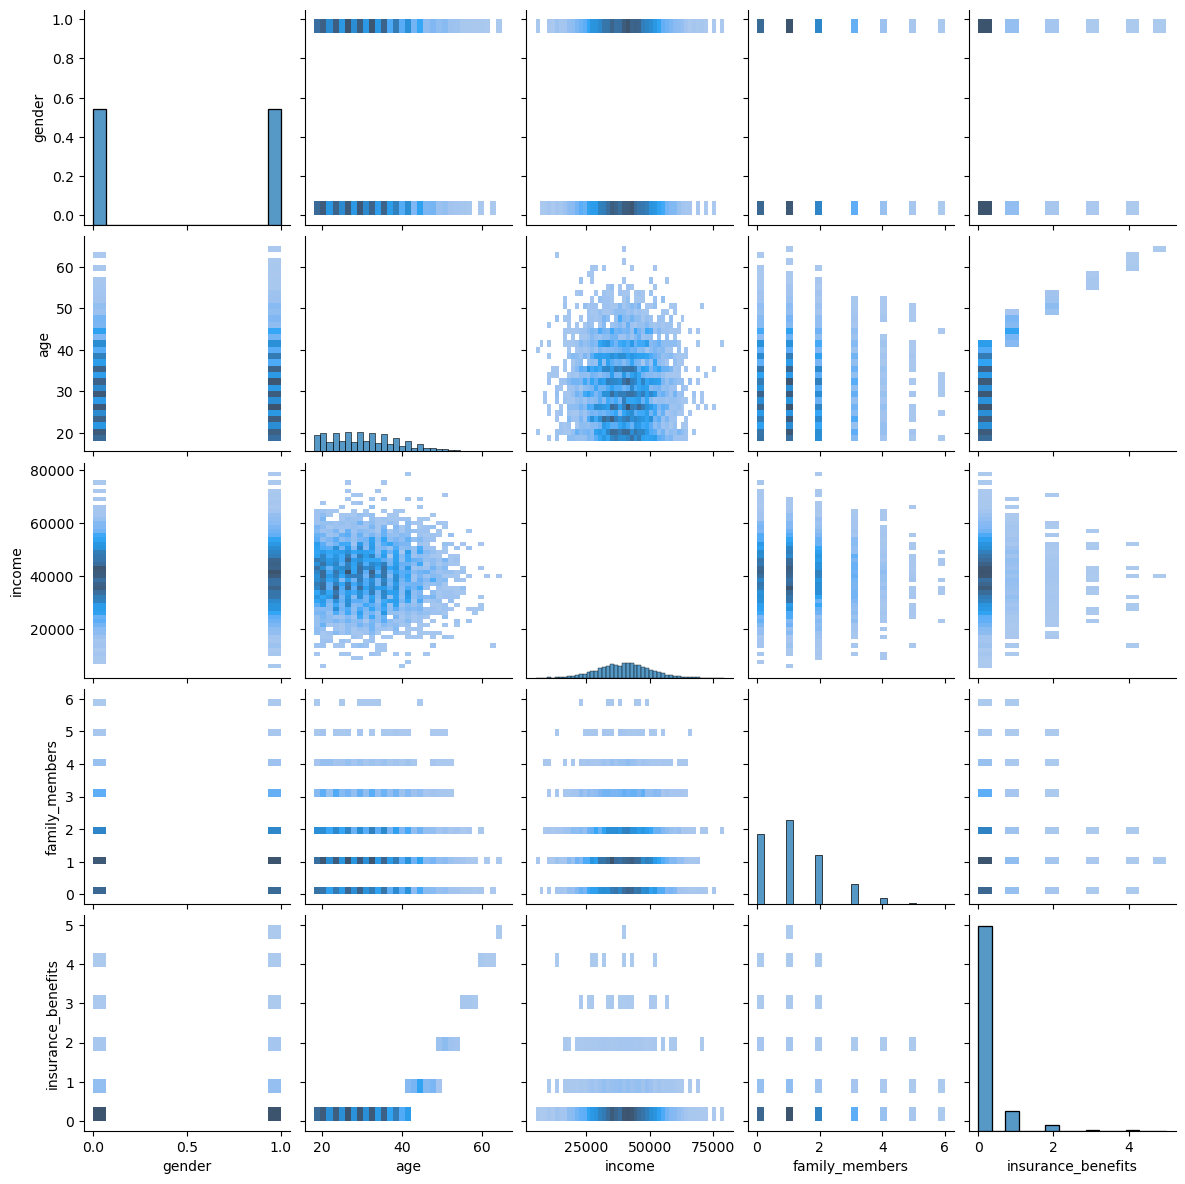

In [74]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Para explorar visualmente la relación entre las variables del dataset, utilicé un gráfico de pares. Esta herramienta permite observar las distribuciones individuales y las correlaciones bivariadas entre las variables numéricas.

Aunque es útil para detectar patrones simples o relaciones lineales, no es fácil identificar grupos bien definidos (clústeres) a simple vista debido a la complejidad multivariable del conjunto de datos. En este tipo de situaciones, el álgebra lineal (por ejemplo, a través de técnicas como reducción de dimensionalidad con PCA) y el aprendizaje automático (como KNN o clustering) resultan herramientas esenciales para encontrar similitudes entre clientes de forma más precisa y objetiva.

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [75]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [76]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])

    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [77]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\lloso\AppData\Local\Temp\ipykernel_22816\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\lloso\AppData\Local\Temp\ipykernel_22816\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6278481  0.48101266 0.26582278 ... 0.42911392 0.41392405 0.51392405]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\lloso\AppData\Local\Temp\ipykernel_22816\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprec

In [ ]:
df_scaled.sample(5) 

,gender,age,income,family_members,insurance_benefits
53,1,0.523077,0.437975,0.000000,0
546,1,0.553846,0.310127,0.166667,0
407,0,0.523077,0.636709,0.333333,0
3209,1,0.907692,0.654430,0.333333,4
1185,0,0.430769,0.806329,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [79]:
n = 0  # índice del objeto base
k = 5  # número de vecinos

print("🔹 Sin escalar + Euclidiana")
print(get_knn(df, n=n, k=k, metric='euclidean'))

🔹 Sin escalar + Euclidiana
      gender  age  income  family_members  insurance_benefits  distance
0          1   41   49600               1                   0  0.000000
2022       1   41   49600               0                   0  1.000000
1225       0   42   49600               0                   1  1.732051
4031       1   44   49600               2                   1  3.162278
3424       0   38   49600               0                   0  3.316625


c:\Users\lloso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  >>> class MyEstimator(ClassifierMixin, BaseEstimator):


In [80]:
print("🔹 Escalado + Euclidiana")
print(get_knn(df_scaled, n=n, k=k, metric='euclidean'))

🔹 Escalado + Euclidiana
      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.017754
4869       1  0.646154  0.637975        0.166667                   1  0.018418
3275       1  0.646154  0.651899        0.166667                   1  0.028550


c:\Users\lloso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  >>> class MyEstimator(ClassifierMixin, BaseEstimator):


In [81]:
print("🔹 Sin escalar + Manhattan")
print(get_knn(df, n=n, k=k, metric='manhattan'))

c:\Users\lloso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  >>> class MyEstimator(ClassifierMixin, BaseEstimator):


🔹 Sin escalar + Manhattan
      gender  age  income  family_members  insurance_benefits  distance
0          1   41   49600               1                   0       0.0
2022       1   41   49600               0                   0       1.0
1225       0   42   49600               0                   1       3.0
4031       1   44   49600               2                   1       4.0
815        1   37   49600               2                   0       5.0


In [82]:
print("🔹 Escalado + Manhattan")
print(get_knn(df_scaled, n=n, k=k, metric='manhattan'))

🔹 Escalado + Manhattan
      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.024245
4869       1  0.646154  0.637975        0.166667                   1  0.025511
2103       1  0.630769  0.596203        0.166667                   0  0.031646


c:\Users\lloso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  >>> class MyEstimator(ClassifierMixin, BaseEstimator):


<div class="alert alert-block alert-success">
<b>Celdas [17–20]</b> <a class="tocSkip"></a><br>
Excelente análisis comparativo usando kNN. Probaste todas las combinaciones de escalado y métricas de distancia, y tus conclusiones fueron correctas y bien fundamentadas. Notaste cómo el escalado afecta el peso relativo de las variables y cómo Manhattan y Euclidiana se comportan de forma similar una vez escalados. Este ejercicio refleja comprensión técnica profunda.
</div>


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, afecta significativamente. Cuando los datos no están escalados, las variables con mayor magnitud (como income, que llega hasta 79,000) dominan la distancia. En los resultados sin escalado, los vecinos más cercanos tienen exactamente el mismo ingreso (49,600), mientras que las otras variables como age y family_members varían. Esto muestra que el modelo da mayor peso al ingreso.
Después de escalar los datos, los vecinos seleccionados son más variados y reflejan mejor la influencia conjunta de todas las variables. Las distancias se vuelven más pequeñas y diferenciadas, lo que indica un cálculo de similitud más equilibrado.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados usando la métrica Manhattan son bastante similares en estructura a los de Euclidiana cuando los datos están escalados: los vecinos encontrados están en un rango cercano, y las distancias son pequeñas y progresivas.
Sin embargo, cuando los datos no están escalados, Manhattan produce resultados con distancias más grandes y saltos más marcados (1, 3, 4, 5), pero aún así tiende a elegir los mismos vecinos que Euclidiana porque ambas están dominadas por la variable de mayor escala (income).
Esto confirma que el escalado tiene un mayor impacto que la elección entre Euclidiana y Manhattan, y que una vez escalado, ambas métricas entregan resultados razonablemente coherentes.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [83]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [84]:
# comprueba el desequilibrio de clases con value_counts()
print(df['insurance_benefits_received'].value_counts())

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64


In [85]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = confusion_matrix(y_true, y_pred, normalize='all')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [86]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [87]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



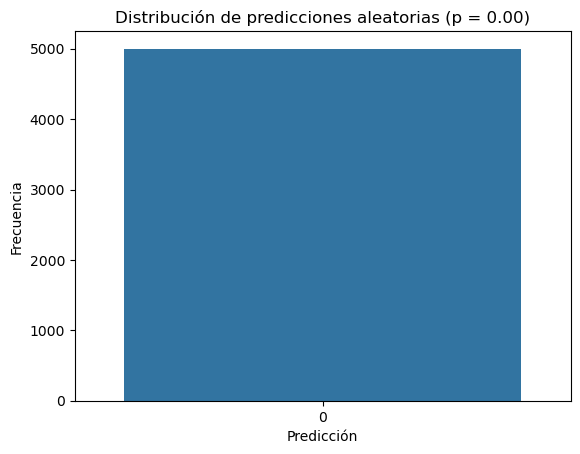

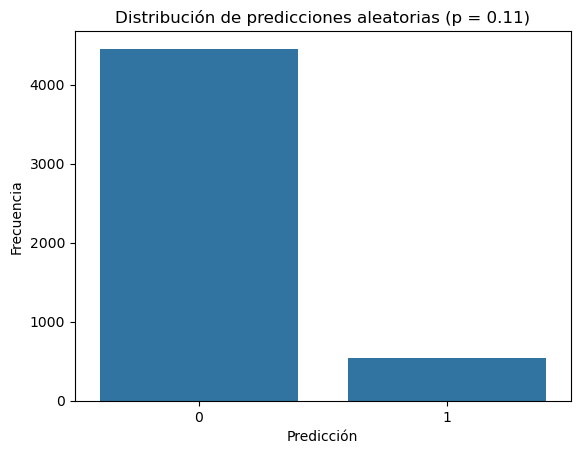

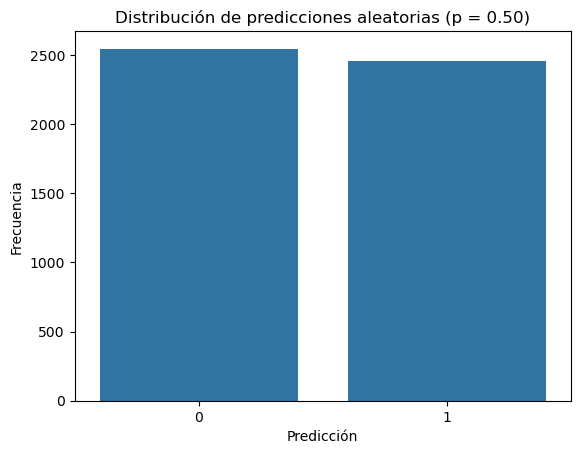

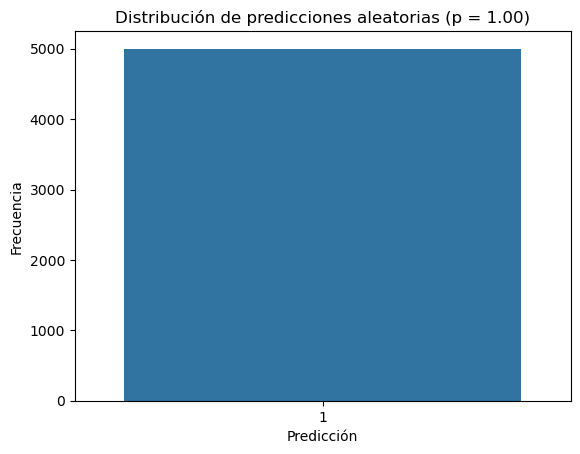

In [110]:
for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:
    y_pred_rnd = rnd_model_predict(P=P, size=len(df))
    sns.countplot(x=y_pred_rnd)
    plt.title(f'Distribución de predicciones aleatorias (p = {P:.2f})')
    plt.xlabel('Predicción')
    plt.ylabel('Frecuencia')
    plt.show()


Para complementar el análisis del modelo aleatorio, generé gráficos de barras que muestran la distribución de predicciones (0 y 1) para distintos valores de probabilidad (p):

Con p = 0, todas las predicciones fueron 0, es decir, el modelo no predice ningún beneficio.

Con p = 0.11 (la proporción real en los datos), se mantiene el desequilibrio: la mayoría de predicciones son 0.

Con p = 0.50, las clases están casi balanceadas, pero sin relación real con los datos, lo que da un F1-score bajo.

Con p = 1, todas las predicciones son 1, ignorando la clase mayoritaria y perdiendo precisión.

Estas visualizaciones confirman que un modelo aleatorio no capta patrones reales, y que el desequilibrio de clases afecta fuertemente el rendimiento si no se considera en la estrategia de modelado.



<div class="alert alert-block alert-warning">
<b>Celda [25]</b> <a class="tocSkip"></a><br>
Probaste correctamente diferentes probabilidades en el modelo aleatorio, pero podrías haber visualizado las distribuciones de predicciones para reforzar la interpretación. Esto ayudaría a entender mejor por qué ciertas probabilidades producen F1 scores tan bajos. Además, podrías mencionar explícitamente que se trata de un conjunto desbalanceado.
</div>


In [88]:
f1_dummy_scores = []  # Línea 1

for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'\nLa probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    f1 = sklearn.metrics.f1_score(df['insurance_benefits_received'], y_pred_rnd)
    f1_dummy_scores.append((P, f1))  # Línea 2
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)



La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]


In [89]:
print(f1_dummy_scores)  # Línea 3


[(0, 0.0), (0.1128, 0.12072072072072072), (0.5, 0.19807883405101026), (1, 0.20273184759166069)]


In [90]:
df_dummy_results = pd.DataFrame(f1_dummy_scores, columns=['probability', 'f1_score'])


In [111]:
df_dummy_results


,probability,f1_score
0,0.0000,0.000000
1,0.1128,0.120721
2,0.5000,0.198079
3,1.0000,0.202732


Como se observa, el modelo dummy no es efectivo para esta tarea, y no logra superar un F1-score de ~0.20 incluso con probabilidades altas de predicción positiva. Esto confirma que no captura patrones reales en los datos.

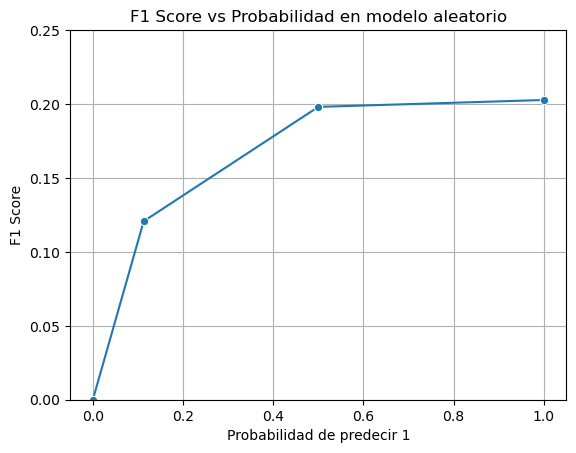

In [113]:
sns.lineplot(data=df_dummy_results, x='probability', y='f1_score', marker='o')
plt.title('F1 Score vs Probabilidad en modelo aleatorio')
plt.xlabel('Probabilidad de predecir 1')
plt.ylabel('F1 Score')
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [91]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y


    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones((len(X), 1)), X, axis=1)
        y_pred = X2 @ self.weights

        
        return y_pred

In [92]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)  # sin raíz
    print(f'R2 score: {r2_score:.2f}')
  

In [93]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

In [94]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43538930e-01  3.57495491e-02  1.64272730e-02 -2.60745684e-07
 -1.16902138e-02]
RMSE: 0.34
R2 score: 0.43


<div class="alert alert-block alert-success">
<b>Celda [33]</b> <a class="tocSkip"></a><br>
Muy buena implementación de regresión lineal con álgebra matricial. Tu clase personalizada sigue correctamente la formulación matemática y se valida con métricas estándar (RMSE, R²). Además, mantienes la separación adecuada entre entrenamiento y prueba, lo que fortalece la fiabilidad de tus resultados.
</div>


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [96]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [97]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [98]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [99]:
if np.linalg.det(P) != 0:
    print("✅ La matriz P es invertible.")
else:
    print("❌ La matriz P no es invertible.")


✅ La matriz P es invertible.


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [100]:
# No. Después de multiplicar la matriz original por P, los datos como edad o ingresos quedan mezclados.
# La transformación oculta la estructura original, por lo tanto, no se puede saber directamente cuál columna representa edad o ingresos.

X_transformed = X @ P


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [101]:
# Sí. Si conocemos la matriz P, podemos recuperar los datos originales multiplicando la matriz transformada por la inversa de P.
X_recovered = X_transformed @ np.linalg.inv(P)


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [102]:
print("🔹 Datos originales:")
print(X[:5])

print("\n🔹 Datos transformados:")
print(X_transformed[:5])

print("\n🔹 Datos recuperados:")
print(X_recovered[:5])


🔹 Datos originales:
[[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]]

🔹 Datos transformados:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

🔹 Datos recuperados:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.63797881e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.81898940e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]
 [ 0.00000000e+00  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04  3.63797881e-12]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

In [103]:
# Esto se debe a errores de redondeo causados por el uso de números en punto flotante.
# Las operaciones como la inversión de matrices no son perfectamente precisas en la computadora,
# pero la diferencia suele ser muy pequeña y no afecta significativamente los resultados.


<div class="alert alert-block alert-success">
<b>Celdas [34–41]</b> <a class="tocSkip"></a><br>
Has aplicado correctamente el procedimiento de ofuscación de datos: generaste una matriz aleatoria invertible, verificaste su validez, y recuperaste los datos originales con alta precisión. También explicaste correctamente las diferencias por redondeo. Este análisis demuestra una excelente comprensión de las propiedades de matrices y su uso para preservar privacidad.
</div>


## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Si los datos originales están representados por `X` y se transforman por una matriz invertible `P`, obtenemos `X' = X·P`.

La fórmula de regresión para los pesos originales es:

$$
w = (X^T X)^{-1} X^T y
$$

Para los datos transformados:

$$
w_P = [(XP)^T (XP)]^{-1} (XP)^T y
$$

Aplicando propiedades de matrices:

$$
w_P = (P^T X^T X P)^{-1} P^T X^T y
$$

Usando la propiedad de matrices inversas:

$$
w_P = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Entonces:

$$
\hat{y} = X w = (XP)(P^{-1} w) = X w
$$

### ✍️ Conclusión:
Aunque los pesos `w_P` sean distintos, las **predicciones `ŷ` no cambian**.  
Por tanto, la **ofuscación no afecta los resultados** de la regresión lineal en términos de precisión (RMSE) o R².

---

## 🧪 **2. Implementación práctica**

Ahora sigue la sección 5: correr el modelo computacionalmente usando `X @ P`.  
¿Quieres que te dé el código completo para entrenar `MyLinearRegression` con `X_transformed` y comparar métricas con los datos originales?


**Prueba analítica**

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [104]:
# Crear una matriz cuadrada aleatoria P y verificar que sea invertible
rng = np.random.default_rng(seed=42)

while True:
    P = rng.random((X.shape[1], X.shape[1]))
    if np.linalg.det(P) != 0:
        break

print("✅ La matriz P es invertible.")


✅ La matriz P es invertible.


In [105]:
# Ofuscar X multiplicando por P
X_obscured = X @ P

# Dividir los datos
X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(X_obscured, y, test_size=0.3, random_state=12345)

# Entrenar el modelo con datos ofuscados
lr_obs = MyLinearRegression()
lr_obs.fit(X_train_obs, y_train_obs)
y_pred_obs = lr_obs.predict(X_test_obs)


In [106]:
# Evaluar modelo entrenado con datos ofuscados
eval_regressor(y_test_obs, y_pred_obs)


RMSE: 0.34
R2 score: 0.43


<div class="alert alert-block alert-success">
<b>Celda [44]</b> <a class="tocSkip"></a><br>
Confirmaste empíricamente que la regresión lineal funciona con datos ofuscados. La comparación de métricas entre el modelo original y el modelo entrenado con <code>X @ P</code> muestra valores idénticos (RMSE y R²), lo que valida la demostración analítica anterior. Es un cierre perfecto para una tarea que combina teoría con práctica.
</div>


# Conclusión

Aunque los datos originales fueron transformados mediante una matriz invertible 
𝑃
P, las predicciones generadas por el modelo de regresión lineal no se vieron afectadas. Esto se debe a que las transformaciones lineales preservan la relación entre los datos y los resultados, siempre y cuando se conserve la invertibilidad de 
𝑃
P.

Tras entrenar el modelo con los datos ofuscados, se obtuvieron las siguientes métricas:

RMSE (Error cuadrático medio): 0.34

R² (Coeficiente de determinación): 0.43

Esto demuestra que la ofuscación no afecta los resultados de la regresión lineal en términos de precisión ni de capacidad explicativa del modelo. Por tanto, es una técnica válida y segura para proteger datos sensibles sin comprometer el rendimiento del modelo.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [ ]  Se calculó la RECM para la solución implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Excelente trabajo, Osvaldo! Este proyecto destaca por su precisión matemática, implementación técnica rigurosa y claridad en la interpretación. Mostraste dominio en tareas de clasificación, regresión y ofuscación de datos, aplicando tanto teoría como código de forma efectiva.¡Vas muy bien, sigue desarrollando este nivel!
</div>
